In [951]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [952]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

In [953]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [954]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [955]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [956]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [957]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## AGE 에 대해 NaN 값 처리

In [958]:
# all_data['Name'] = list(map(lambda x : x.split()[1][:-1] , all_data['Name']))
# all_data['Name'].unique()

In [959]:
all_data['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [960]:
# all_data['Name'] = all_data['Name'].apply(lambda x: x if x.split()[1][:-1] not in ['Mr', 'Miss', 'Mrs','Master'] else x.split()[1][:-1])
# all_data['Name'].unique()

In [961]:
all_data["Occupation"] = all_data["Name"].str.split(",|\\.").str[1].str.strip()

# 직업 정보를 출력합니다.
print(all_data["Occupation"])

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Occupation, Length: 1309, dtype: object


In [962]:
all_data['Occupation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [963]:
t = all_data['Occupation'].unique()[4:-1]
t

array(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle',
       'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [964]:
for i in t:

    print(all_data[all_data["Name"].str.contains(i)])

             Pclass                                         Name     Sex  \
PassengerId                                                                
31                1                     Uruchurtu, Don. Manuel E    male   
545               1                   Douglas, Mr. Walter Donald    male   
980               3                      O'Donoghue, Ms. Bridget  female   
1131              1  Douglas, Mrs. Walter Donald (Mahala Dutton)  female   
1306              1                 Oliva y Ocana, Dona. Fermina  female   

              Age  SibSp  Parch    Ticket      Fare Cabin Embarked Occupation  
PassengerId                                                                    
31           40.0      0      0  PC 17601   27.7208   NaN        C        Don  
545          50.0      1      0  PC 17761  106.4250   C86        C         Mr  
980           NaN      0      0    364856    7.7500   NaN        Q         Ms  
1131         48.0      1      0  PC 17761  106.4250   C86        C 

In [965]:
all_data['Name'] =all_data['Occupation']

In [966]:
all_data['Name'] = all_data['Name'].apply(lambda x: 'baby' if x not in ['Mr', 'Miss', 'Mrs'] else x)
all_data


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


In [967]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder , OneHotEncoder #레이블 인코더 , 원 핫 인코더
#
# label_encoder = LabelEncoder() # 레이블 인코더 생성
# onehot_encoder = OneHotEncoder()
#
# all_data_label_encoded = label_encoder.fit_transform(all_data) # 레이블 인코더 적용
#
# all_data_onehot_encoded = onehot_encoder.fit_transform(all_data_label_encoded.reshape(-1,1))
# # reshape(-1,1) 메서드를 이용해 2차원으로 바꾸었다.
# print('원-핫 인코딩 적용 후 데이터 ' , all_data_onehot_encoded.toarray())
#
#
# all_data_onehot_encoded

In [968]:
all_data.drop(all_data[['Ticket' , 'Cabin']] , axis = 1 , inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,Mr,male,22.0,1,0,7.2500,S,Mr
2,1,Mrs,female,38.0,1,0,71.2833,C,Mrs
3,3,Miss,female,26.0,0,0,7.9250,S,Miss
4,1,Mrs,female,35.0,1,0,53.1000,S,Mrs
5,3,Mr,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,8.0500,S,Mr
1306,1,baby,female,39.0,0,0,108.9000,C,Dona
1307,3,Mr,male,38.5,0,0,7.2500,S,Mr


In [969]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
180,3,Mr,male,36.0,0,0,0.0,S,Mr
264,1,Mr,male,40.0,0,0,0.0,S,Mr
272,3,Mr,male,25.0,0,0,0.0,S,Mr
278,2,Mr,male,NaN,0,0,0.0,S,Mr
303,3,Mr,male,19.0,0,0,0.0,S,Mr
414,2,Mr,male,NaN,0,0,0.0,S,Mr
467,2,Mr,male,NaN,0,0,0.0,S,Mr
482,2,Mr,male,NaN,0,0,0.0,S,Mr
598,3,Mr,male,49.0,0,0,0.0,S,Mr


In [970]:
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode().iloc[0])

fare_medians = all_data[all_data['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data.iterrows():
    if row['Fare'] == 0 or row['Fare'] == 'NaN':
        all_data.at[i, 'Fare'] = fare_medians[row['Pclass']]
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].mode().iloc[0])
# 결과 확인
all_data.loc[816:824]

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,Mr,male,22.0,1,0,7.2500,S,Mr
2,1,Mrs,female,38.0,1,0,71.2833,C,Mrs
3,3,Miss,female,26.0,0,0,7.9250,S,Miss
4,1,Mrs,female,35.0,1,0,53.1000,S,Mrs
5,3,Mr,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,8.0500,S,Mr
1306,1,baby,female,39.0,0,0,108.9000,C,Dona
1307,3,Mr,male,38.5,0,0,7.2500,S,Mr


In [971]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,


In [972]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Name        1309 non-null   object 
 2   Sex         1309 non-null   object 
 3   Age         1046 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   object 
 8   Occupation  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 134.6+ KB


In [973]:
binary_col = []
object_col = []

for i in all_data.columns.tolist():
    if all_data[i].dtype in ['int64' , 'float64']:
        binary_col.append(i)
    else:
        object_col.append(i)

In [974]:
all_data[object_col]

,Name,Sex,Embarked,Occupation
PassengerId,,,,
1,Mr,male,S,Mr
2,Mrs,female,C,Mrs
3,Miss,female,S,Miss
4,Mrs,female,S,Mrs
5,Mr,male,S,Mr
...,...,...,...,...
1305,Mr,male,S,Mr
1306,baby,female,C,Dona
1307,Mr,male,S,Mr


In [975]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
le = LabelEncoder()
for i in range(len(object_col)):
    all_data_label_encoded = le.fit_transform(all_data[object_col[i]])
    all_data[object_col[i]] = all_data_label_encoded
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,1,1,22.0,1,0,7.2500,2,12
2,1,2,0,38.0,1,0,71.2833,0,13
3,3,0,0,26.0,0,0,7.9250,2,9
4,1,2,0,35.0,1,0,53.1000,2,13
5,3,1,1,35.0,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
1305,3,1,1,NaN,0,0,8.0500,2,12
1306,1,3,0,39.0,0,0,108.9000,0,3
1307,3,1,1,38.5,0,0,7.2500,2,12


In [976]:
all_data.iloc[:len(train)]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,1,1,22.0,1,0,7.2500,2,12
2,1,2,0,38.0,1,0,71.2833,0,13
3,3,0,0,26.0,0,0,7.9250,2,9
4,1,2,0,35.0,1,0,53.1000,2,13
5,3,1,1,35.0,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
887,2,3,1,27.0,0,0,13.0000,2,15
888,1,0,0,19.0,0,0,30.0000,2,9
889,3,0,0,NaN,1,2,23.4500,2,9


In [977]:
all_data[pd.isnull(all_data['Age'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
6,3,1,1,NaN,0,0,8.4583,1,12
18,2,1,1,NaN,0,0,13.0000,2,12
20,3,2,0,NaN,0,0,7.2250,0,13
27,3,1,1,NaN,0,0,7.2250,0,12
29,3,0,0,NaN,0,0,7.8792,1,9
...,...,...,...,...,...,...,...,...,...
1300,3,0,0,NaN,0,0,7.7208,1,9
1302,3,0,0,NaN,0,0,7.7500,1,9
1305,3,1,1,NaN,0,0,8.0500,2,12


In [978]:

num_train = len(train) # 훈련데이터 개수
print(num_train)

X_train = all_data[~pd.isnull(all_data['Age'])]
X_test = all_data[pd.isnull(all_data['Age'])]


X_train = X_train.drop(['Age'] , axis =1)
X_test = X_test.drop(['Age'] , axis =1)
train2 = all_data[~pd.isnull(all_data['Age'])]
y = train2['Age']
y

891


PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [979]:
X_train

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,
1,3,1,1,1,0,7.2500,2,12
2,1,2,0,1,0,71.2833,0,13
3,3,0,0,0,0,7.9250,2,9
4,1,2,0,1,0,53.1000,2,13
5,3,1,1,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...
1301,3,0,0,1,1,13.7750,2,9
1303,1,2,0,1,0,90.0000,1,13
1304,3,0,0,0,0,7.7750,2,9


In [980]:
y

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [981]:
X_train[X_train['Fare'].isnull()==True]

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,


In [982]:
X_train[X_train['Embarked'].isnull()==True]

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,


In [983]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train , y) # 모델 훈련

LinearRegression()

In [984]:
preds = linear_reg_model.predict(X_test)
preds.tolist()
preds

array([27.619, 34.839, 29.323, 27.155, 19.583, 28.071, 41.111, 19.582,
       27.155, 27.159, 28.072, 25.029, 19.582, 21.978, 41.727, 40.762,
       17.598, 28.071, 28.072, 19.583, 28.072, 28.072, 28.071, 28.07 ,
       17.057, 28.072, 27.614, 15.509, 27.219, 28.067, 28.076, -0.663,
       42.95 , 41.661, 13.304, -2.801, 33.941, 41.827, 27.197, 27.614,
       19.582,  5.231, 24.976, 28.071, 11.166, 20.037, 16.535, 16.998,
       28.066, 43.285, 27.614, 19.582, 41.696, 19.582, 34.853, 41.661,
       40.762, 41.692, 19.582, 22.444, 26.347, 28.072, 33.303,  5.231,
       14.413, 41.933, 28.071, 27.657, 41.723, 27.155, 19.583, 19.583,
       25.029, 29.323, 19.582, 40.667, 28.071, 27.614, 11.166, 28.071,
       27.608, 34.853, 30.24 , 27.159, 28.066, 27.614, 27.657, 28.072,
       25.516, 28.072, 41.369, 27.614, 28.072, 34.853, 27.614, 28.066,
       41.84 , 34.853, 11.166, 25.516, 27.205, 28.12 , 19.582, 41.665,
       28.072, 27.727, 27.155, 27.155, 43.011, 27.155, 27.268, 28.116,
      

In [985]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,1,1,22.0,1,0,7.2500,2,12
2,1,2,0,38.0,1,0,71.2833,0,13
3,3,0,0,26.0,0,0,7.9250,2,9
4,1,2,0,35.0,1,0,53.1000,2,13
5,3,1,1,35.0,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
1305,3,1,1,NaN,0,0,8.0500,2,12
1306,1,3,0,39.0,0,0,108.9000,0,3
1307,3,1,1,38.5,0,0,7.2500,2,12


In [986]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Name        1309 non-null   int32  
 2   Sex         1309 non-null   int32  
 3   Age         1046 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   int32  
 8   Occupation  1309 non-null   int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 114.1 KB


In [987]:
nan_idx = all_data['Age'].isnull()
all_data.loc[nan_idx, 'Age'] = preds

In [988]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,1,1,22.000000,1,0,7.2500,2,12
2,1,2,0,38.000000,1,0,71.2833,0,13
3,3,0,0,26.000000,0,0,7.9250,2,9
4,1,2,0,35.000000,1,0,53.1000,2,13
5,3,1,1,35.000000,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
1305,3,1,1,28.071796,0,0,8.0500,2,12
1306,1,3,0,39.000000,0,0,108.9000,0,3
1307,3,1,1,38.500000,0,0,7.2500,2,12


## 위에꺼 까지가 연령에 대한 전처리 ==> 회귀 분석 사용

In [989]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Name        1309 non-null   int32  
 2   Sex         1309 non-null   int32  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   int32  
 8   Occupation  1309 non-null   int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 114.1 KB


In [990]:
all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.000000,1,0,7.2500
2,1,38.000000,1,0,71.2833
3,3,26.000000,0,0,7.9250
4,1,35.000000,1,0,53.1000
5,3,35.000000,0,0,8.0500
...,...,...,...,...,...
1305,3,28.071796,0,0,8.0500
1306,1,39.000000,0,0,108.9000
1307,3,38.500000,0,0,7.2500


In [991]:
all_data[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1309 non-null   float64
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null   int64  
 4   Fare    1309 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 93.6 KB


In [992]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Occupation
PassengerId,,,,,,,,,
1,3,1,1,22.000000,1,0,7.2500,2,12
2,1,2,0,38.000000,1,0,71.2833,0,13
3,3,0,0,26.000000,0,0,7.9250,2,9
4,1,2,0,35.000000,1,0,53.1000,2,13
5,3,1,1,35.000000,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
1305,3,1,1,28.071796,0,0,8.0500,2,12
1306,1,3,0,39.000000,0,0,108.9000,0,3
1307,3,1,1,38.500000,0,0,7.2500,2,12


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [993]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x559 sparse matrix of type '<class 'numpy.float64'>'
	with 11781 stored elements in Compressed Sparse Row format>

### 데이터 나누기

In [994]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_encoded[:num_train] # 0~num_train -1 행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['Survived']

In [995]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 , 검증 데이터 분리

X_train , X_valid , y_train , y_valid = train_test_split(X_train , y , test_size=0.1 , stratify=y,random_state=10)

# test_size 는 검증 데이터 크기를 지정하는 파라미터이다.
# 값이 정수면 검증 데이터의 개수를 , 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10%를 검증 데이터로 분리하겠다는 의미이다.

# stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포 될 수 있다.

### 모델 훈련

In [996]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000 , random_state=42)
logistic_model.fit(X_train,y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

# 모델 성능 검증

- predict()는 타깃값 자체를 예측한다.

- predict_proba()는 타깃값의 확률(0일 확률과 1일 확률)을 예측한다.

In [997]:
logistic_model.predict_proba(X_valid)

array([[0.862, 0.138],
       [0.589, 0.411],
       [0.721, 0.279],
       [0.849, 0.151],
       [0.929, 0.071],
       [0.906, 0.094],
       [0.287, 0.713],
       [0.145, 0.855],
       [0.947, 0.053],
       [0.392, 0.608],
       [0.631, 0.369],
       [0.946, 0.054],
       [0.135, 0.865],
       [0.976, 0.024],
       [0.967, 0.033],
       [0.571, 0.429],
       [0.855, 0.145],
       [0.306, 0.694],
       [0.2  , 0.8  ],
       [0.965, 0.035],
       [0.927, 0.073],
       [0.029, 0.971],
       [0.016, 0.984],
       [0.878, 0.122],
       [0.522, 0.478],
       [0.595, 0.405],
       [0.703, 0.297],
       [0.837, 0.163],
       [0.393, 0.607],
       [0.121, 0.879],
       [0.601, 0.399],
       [0.065, 0.935],
       [0.955, 0.045],
       [0.942, 0.058],
       [0.032, 0.968],
       [0.618, 0.382],
       [0.903, 0.097],
       [0.767, 0.233],
       [0.792, 0.208],
       [0.795, 0.205],
       [0.917, 0.083],
       [0.261, 0.739],
       [0.684, 0.316],
       [0.8

In [998]:
logistic_model.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [999]:
# 검증 데이터를 활용한 타깃 예측

y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

In [1000]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC

roc_auc = roc_auc_score(y_valid , y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.9055


In [1001]:
# 타깃값 1일 확룰 예측

y_preds= logistic_model.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1002]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv('submission_1.csv')

## 성능 개선 -> 피처 엔지니어링

In [1003]:
# all_data_bin = all_data[binary_col].fillna(all_data[binary_col].mode().iloc[0]) # NaN 값 제일 많은값으로 대체
#
# all_data_bin

In [1004]:
# object_col = ['Name' , 'Sex' , 'Ticket' , 'Embarked']
all_data_obj = all_data[object_col]
# all_data_obj = all_data[object_col].fillna(all_data[object_col].mode().iloc[0])
all_data_obj[object_col].info()
# NaN 값 제일 많은값으로 대체인데, train[object_col]에는 NaN값 특히 Cabin에 있다. ==> Cabin값은 빼는게 낫지 않을까?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Name        1309 non-null   int32
 1   Sex         1309 non-null   int32
 2   Embarked    1309 non-null   int32
 3   Occupation  1309 non-null   int32
dtypes: int32(4)
memory usage: 63.0 KB


In [1005]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

In [1006]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬



# plt.figure(figsize=(7,6))
# train_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# ax = sns.countplot(x='Survival' , data = train_bin)
# write_percent(ax , len(train)) # 비율 표시
# ax.set_title('타이타닉 호 생존자')

In [1007]:
binary_col

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## 연속형 피처 분포

In [1008]:
all_data_bin = all_data[binary_col]

all_data_bin

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.000000,1,0,7.2500
2,1,38.000000,1,0,71.2833
3,3,26.000000,0,0,7.9250
4,1,35.000000,1,0,53.1000
5,3,35.000000,0,0,8.0500
...,...,...,...,...,...
1305,3,28.071796,0,0,8.0500
1306,1,39.000000,0,0,108.9000
1307,3,38.500000,0,0,7.2500


## 명목형 자료에 대해 계급간격 공식을 이용하여 범주화 시키기

- https://knowallworld.tistory.com/197

In [1009]:
K = 60 # 계급간격
AGG = 10 # Age 간격

[530 216 191  81  29  41  43  24  34  23  13   0  13   4   0  13   3   9
   0   4   0   0   0   0   9   4   5   0   3   0  13   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
[  3.171  11.657  20.143  28.629  37.115  45.601  54.087  62.573  71.059
  79.545  88.031  96.517 105.002 113.488 121.974 130.46  138.946 147.432
 155.918 164.404 172.89  181.376 189.862 198.348 206.834 215.32  223.806
 232.292 240.778 249.264 257.75  266.236 274.722 283.208 291.694 300.18
 308.666 317.152 325.638 334.124 342.61  351.096 359.582 368.068 376.554
 385.04  393.526 402.012 410.498 418.983 427.469 435.955 444.441 452.927
 461.413 469.899 478.385 486.871 495.357 503.843]


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

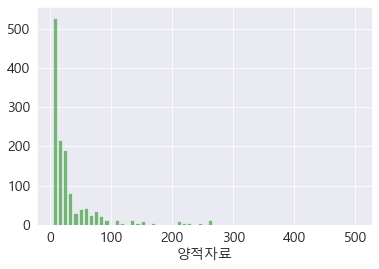

In [1010]:
width = (max(all_data_bin['Fare']) - min(all_data_bin['Fare'])) / K #계급 간격 구하는 공식
bins = np.arange(min(all_data_bin['Fare']), max(all_data_bin['Fare']), width)


hist, bins = np.histogram(all_data_bin['Fare'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [1011]:
# PClass 등급별 Fare 중앙값(median) 계산
fare_medians = all_data_bin[all_data_bin['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data_bin.iterrows():
    if row['Fare'] == 0:
        all_data_bin.at[i, 'Fare'] = fare_medians[row['Pclass']]

# 결과 확인
all_data_bin.loc[816:824]

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
816,1,41.905029,0,0,61.3792
817,3,23.000000,0,0,7.9250
818,2,31.000000,1,1,37.0042
819,3,43.000000,0,0,6.4500
820,3,10.000000,3,2,27.9000
821,1,52.000000,1,1,93.5000
822,3,27.000000,0,0,8.6625
823,1,38.000000,0,0,61.3792
824,3,27.000000,0,1,12.4750


In [1012]:
all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])
min_log_fare = min(all_data_bin['log_Fare'])
min_log_fare_row = all_data_bin[all_data_bin['log_Fare'] == min_log_fare]
print(min_log_fare_row)
# 제일 log_Fare 값이 작은 열 출력




             Pclass  Age  SibSp  Parch    Fare  log_Fare
PassengerId                                             
913               3  9.0      0      1  3.1708  1.153984


<ipython-input-1012-17cb4e2c0935>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])


width : 0.08474972441987998
6.238967387173662
1.1539839219808636
hist : [  1   0   1   0   0   1   0   1   9  89 307  36  26   9  44  12  73  51
  45  20  13  14  32  31  71  52  34  28  18  21   7  11  13  34  25  11
  17  32  20  16   0  10   7   0  13  12   4   0   0   9   9   3  13   0
   0   0   0   0   0]
bins : [1.154 1.239 1.323 1.408 1.493 1.578 1.662 1.747 1.832 1.917 2.001 2.086
 2.171 2.256 2.34  2.425 2.51  2.595 2.679 2.764 2.849 2.934 3.018 3.103
 3.188 3.273 3.357 3.442 3.527 3.612 3.696 3.781 3.866 3.951 4.035 4.12
 4.205 4.29  4.374 4.459 4.544 4.629 4.713 4.798 4.883 4.968 5.052 5.137
 5.222 5.307 5.391 5.476 5.561 5.646 5.73  5.815 5.9   5.985 6.069 6.154]


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

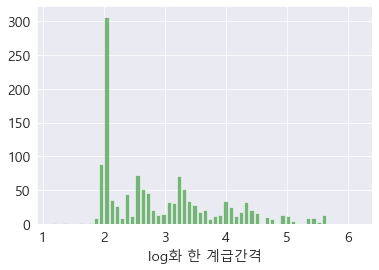

In [1013]:
width = (max(all_data_bin['log_Fare']) - min(all_data_bin['log_Fare'])) / K #계급 간격 구하는 공식
print(f'width : {width}')
print(max(all_data_bin['log_Fare']))
print(min(all_data_bin['log_Fare']))
bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['log_Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('log화 한 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [1014]:
# 범주의 크기를 지정할 width 변수 설정

bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
print(bins)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
width = len(bins)

# 범주의 최솟값(min)과 최댓값(max)을 계산
min_val = all_data_bin['log_Fare'].min()
max_val = all_data_bin['log_Fare'].max()

# 최솟값과 최댓값을 width 간격으로 나눠서 labels 배열 생성
labels = [f'{round(i,1)}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)
# train 데이터프레임 내용 확인
all_data_bin


[1.154 1.239 1.323 1.408 1.493 1.578 1.662 1.747 1.832 1.917 2.001 2.086
 2.171 2.256 2.34  2.425 2.51  2.595 2.679 2.764 2.849 2.934 3.018 3.103
 3.188 3.273 3.357 3.442 3.527 3.612 3.696 3.781 3.866 3.951 4.035 4.12
 4.205 4.29  4.374 4.459 4.544 4.629 4.713 4.798 4.883 4.968 5.052 5.137
 5.222 5.307 5.391 5.476 5.561 5.646 5.73  5.815 5.9   5.985 6.069 6.154]


<ipython-input-1014-0b5141b36130>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)


,Pclass,Age,SibSp,Parch,Fare,log_Fare,Fare_binned
PassengerId,,,,,,,
1,3,22.000000,1,0,7.2500,1.981001,1.9
2,1,38.000000,1,0,71.2833,4.266662,4.2
3,3,26.000000,0,0,7.9250,2.070022,2.0
4,1,35.000000,1,0,53.1000,3.972177,4.0
5,3,35.000000,0,0,8.0500,2.085672,2.0
...,...,...,...,...,...,...,...
1305,3,28.071796,0,0,8.0500,2.085672,2.0
1306,1,39.000000,0,0,108.9000,4.690430,4.6
1307,3,38.500000,0,0,7.2500,1.981001,1.9


In [1015]:
labels = [f"{bins[i]:.1f}~{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned_범위'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered=False)
# train 데이터프레임 내용 확인
all_data_bin

<ipython-input-1015-43979e340fd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['Fare_binned_범위'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered=False)


,Pclass,Age,SibSp,Parch,Fare,log_Fare,Fare_binned,Fare_binned_범위
PassengerId,,,,,,,,
1,3,22.000000,1,0,7.2500,1.981001,1.9,1.9~2.0
2,1,38.000000,1,0,71.2833,4.266662,4.2,4.2~4.3
3,3,26.000000,0,0,7.9250,2.070022,2.0,2.0~2.1
4,1,35.000000,1,0,53.1000,3.972177,4.0,3.9~4.0
5,3,35.000000,0,0,8.0500,2.085672,2.0,2.0~2.1
...,...,...,...,...,...,...,...,...
1305,3,28.071796,0,0,8.0500,2.085672,2.0,2.0~2.1
1306,1,39.000000,0,0,108.9000,4.690430,4.6,4.6~4.7
1307,3,38.500000,0,0,7.2500,1.981001,1.9,1.9~2.0


In [1016]:
print(all_data_bin['Fare_binned'].unique())

print(all_data_bin['Fare_binned_범위'].unique())

['1.9', '4.2', '2.0', '4.0', '2.1', ..., '5.3', '1.3', '5.4', '1.6', '1.2']
Length: 42
Categories (42, object): ['1.9', '4.2', '2.0', '4.0', ..., '1.3', '5.4', '1.6', '1.2']
['1.9~2.0', '4.2~4.3', '2.0~2.1', '3.9~4.0', '2.1~2.2', ..., '4.5~4.5', '4.5~4.6', '3.7~3.8', '1.6~1.7', '1.2~1.2']
Length: 47
Categories (47, object): ['1.9~2.0', '4.2~4.3', '2.0~2.1', '3.9~4.0', ..., '4.5~4.6', '3.7~3.8', '1.6~1.7', '1.2~1.2']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

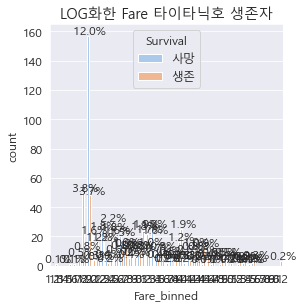

In [1017]:
from matplotlib import gridspec

mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정
all_data_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(['Fare_binned']) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = all_data_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'LOG화한 Fare 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_bin))



In [1018]:
bins_exp = np.exp(bins)
bins_exp

array([  3.171,   3.451,   3.756,   4.089,   4.45 ,   4.844,   5.272,
         5.739,   6.246,   6.799,   7.4  ,   8.054,   8.767,   9.542,
        10.386,  11.305,  12.305,  13.393,  14.577,  15.867,  17.27 ,
        18.798,  20.46 ,  22.27 ,  24.239,  26.383,  28.717,  31.256,
        34.021,  37.03 ,  40.305,  43.87 ,  47.75 ,  51.973,  56.57 ,
        61.573,  67.019,  72.946,  79.398,  86.42 ,  94.064, 102.383,
       111.438, 121.295, 132.022, 143.699, 156.409, 170.242, 185.299,
       201.688, 219.526, 238.942, 260.075, 283.077, 308.114, 335.365,
       365.026, 397.311, 432.451, 470.698])

### 'AGE' 계급간격 구하기

In [1019]:
all_data_bin['Age'].describe()

count    1309.000000
mean       29.339579
std        13.489511
min        -2.801120
25%        21.000000
50%        28.000000
75%        36.500000
max        80.000000
Name: Age, dtype: float64

[1260]
[-2.801 57.199]


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

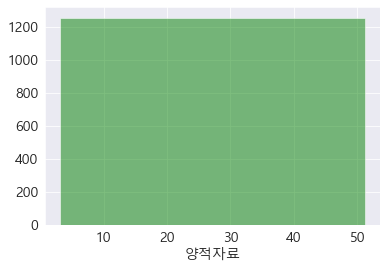

In [1020]:
bins = np.arange(min(all_data_bin['Age']), max(all_data_bin['Age']), width)


hist, bins = np.histogram(all_data_bin['Age'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



### 분포가 생각보다 일정해서 log 화 안해도 될거 같다.
---

### 대신 간격의 수를 줄여야 겠다. 10대 20대 30대 이런식으로 하는것이 좋을 거 같다.

- describe()에서 최대값이 80살 , 최소값이 0살이므로 10개의 계급간격을 나누면 좋을거 같다.

width : 8.280111987803126
80.0
-2.8011198780312547
hist : [ 85 190 496 251 172  70  32   8]
bins : [ 0 10 20 30 40 50 60 70 80]


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

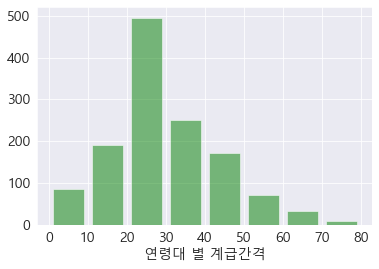

In [1021]:
width = (max(all_data_bin['Age']) - min(all_data_bin['Age'])) / 10 #계급 간격 구하는 공식

# width = np.arange(0,90,10)

print(f'width : {width}')
print(max(all_data_bin['Age']))
print(min(all_data_bin['Age']))
bins = np.arange(0,90,AGG)
hist, bins = np.histogram(all_data_bin['Age'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('연령대 별 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [1022]:
# labels = [f'{i}' for i in bins]
#
# # train['Fare'] 값을 labels에 맞게 범주형으로 변환
# all_data_bin['Age_Categorical'] = pd.cut(all_data_bin['Age'], bins=len(labels), labels=labels)
# # train 데이터프레임 내용 확인
# all_data_bin

In [1023]:
# age_cat_with_daes = all_data_bin['Age_Categorical'].apply(lambda x: str(x)+'대')
#
# # train_bin['Age_Categorical'] 열 대체
# all_data_bin['Age_Categorical'] = age_cat_with_daes
#
# all_data_bin

In [1024]:
all_data_bin.columns.tolist()

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'log_Fare',
 'Fare_binned',
 'Fare_binned_범위',
 'Survival']

In [1025]:
all_data_bin2 = all_data_bin[['Age','Pclass' ,'SibSp','Parch' ,'Survival' , 'Fare' ,'Fare_binned_범위' ]]
all_data_bin2

,Age,Pclass,SibSp,Parch,Survival,Fare,Fare_binned_범위
PassengerId,,,,,,,
1,22.000000,3,1,0,사망,7.2500,1.9~2.0
2,38.000000,1,1,0,생존,71.2833,4.2~4.3
3,26.000000,3,0,0,생존,7.9250,2.0~2.1
4,35.000000,1,1,0,생존,53.1000,3.9~4.0
5,35.000000,3,0,0,사망,8.0500,2.0~2.1
...,...,...,...,...,...,...,...
1305,28.071796,3,0,0,NaN,8.0500,2.0~2.1
1306,39.000000,1,0,0,NaN,108.9000,4.6~4.7
1307,38.500000,3,0,0,NaN,7.2500,1.9~2.0


## train_bin 에는 log 화밑 계급화 시킨 값들 모두 포함 시켰다.

## train_bin2 로 train 데이터로 활용하면 좋을 수 도 있겠다.


---

## 명목형 피처 전처리를 해보자

In [1026]:
all_data_obj

,Name,Sex,Embarked,Occupation
PassengerId,,,,
1,1,1,2,12
2,2,0,0,13
3,0,0,2,9
4,2,0,2,13
5,1,1,2,12
...,...,...,...,...
1305,1,1,2,12
1306,3,0,0,3
1307,1,1,2,12


## 내 생각엔 Name은 필요 없을 거 같고 , 'Sex'와 'Embarked' 만 필요할거 같다.

==> MR. MRS. MISS . baby 등 필요할듯

In [1027]:
# all_data_obj = all_data_obj[['Sex' , 'Embarked']]
# all_data_obj

In [1028]:
all_data_obj2 =  pd.merge(all_data_obj, all_data_bin2['Survival'] , how='outer' , on=('PassengerId'))
all_data_obj2

,Name,Sex,Embarked,Occupation,Survival
PassengerId,,,,,
1,1,1,2,12,사망
2,2,0,0,13,생존
3,0,0,2,9,생존
4,2,0,2,13,생존
5,1,1,2,12,사망
...,...,...,...,...,...
1305,1,1,2,12,NaN
1306,3,0,0,3,NaN
1307,1,1,2,12,NaN


In [1029]:
# # 3행 2열
# mpl.rc('font' , size = 12)
# grid = gridspec.GridSpec(2,2) # 그래프(서브플롯)을 3행 2열로 배치
# plt.figure(figsize=(15,16)) # 전체 Figure 크기 설정
# plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정
#
# # 서브플롯 그리기# 피처 목록
#
# for idx, feature in enumerate(all_data_obj2.columns.tolist()) :
#
#     ax = plt.subplot(grid[idx])
#
#     # ax 축에 타깃값 분포 카운트플롯 그리기
#     sns.countplot(x=feature , data =all_data_obj2 , hue = 'Survival' , palette = 'pastel' , ax= ax)
#     # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
#     ax.set_title(f'{feature} 타이타닉호 생존자') # 그래프 제목 설정
#     write_percent(ax, len(all_data_obj2))


In [1030]:
all_data2 = pd.merge(all_data_obj , all_data_bin2, how='outer' , on=('PassengerId'))

all_data2 = all_data2[['Name','Sex' , 'Embarked' ,'Age', 'Pclass' ,'SibSp' , 'Parch' , 'Fare']]
columns_1 = all_data2.columns.tolist()
all_data2

,Name,Sex,Embarked,Age,Pclass,SibSp,Parch,Fare
PassengerId,,,,,,,,
1,1,1,2,22.000000,3,1,0,7.2500
2,2,0,0,38.000000,1,1,0,71.2833
3,0,0,2,26.000000,3,0,0,7.9250
4,2,0,2,35.000000,1,1,0,53.1000
5,1,1,2,35.000000,3,0,0,8.0500
...,...,...,...,...,...,...,...,...
1305,1,1,2,28.071796,3,0,0,8.0500
1306,3,0,0,39.000000,1,0,0,108.9000
1307,1,1,2,38.500000,3,0,0,7.2500


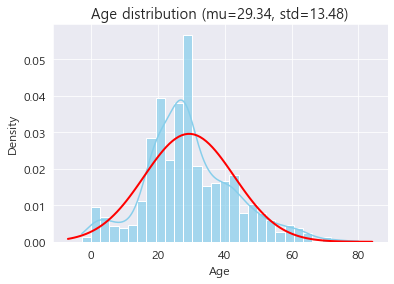

In [1031]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data['Age'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['Age'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Age distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

## 모델링_with 피처엔지니어링

- 명목형 피처는 OneHotEncoding ==> Name , Sex , Embarked

- Pclass 는 MinMaxScaler로

In [1032]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # 원-핫 인코더 생성
nom_feature = ['Name' , 'Sex' , 'Embarked']
encoded_nom_matrix = onehot_encoder.fit_transform(all_data2[nom_feature])
print(type(encoded_nom_matrix))
encoded_nom_matrix

<class 'scipy.sparse.csr.csr_matrix'>


<1309x9 sparse matrix of type '<class 'numpy.float64'>'
	with 3927 stored elements in Compressed Sparse Row format>

In [1033]:
from sklearn.preprocessing import OneHotEncoder

# 범주형 변수의 원래 이름을 추출합니다.
nom_feature = [ 'Sex' , 'Embarked']
nom_feature_names = []
for feature in nom_feature:
    categories = onehot_encoder.categories_[nom_feature.index(feature)]
    for category in categories:
        nom_feature_names.append(f"{feature}_{category}")

# 범주형 변수를 OneHotEncoder로 변환합니다.
# encoded_nom_matrix = onehot_encoder.transform(all_data2[nom_feature])
#
# # 변환된 CSR 행렬의 피처명을 추출합니다.
# encoded_nom_names = onehot_encoder.get_feature_names(nom_feature_names)

# 결과를 출력합니다.
print(nom_feature_names)


['Sex_0', 'Sex_1', 'Sex_2', 'Sex_3', 'Embarked_0', 'Embarked_1']


In [1034]:
print(type(encoded_nom_matrix))

<class 'scipy.sparse.csr.csr_matrix'>


In [1035]:
all_data2 = all_data2.drop(nom_feature , axis =1)

In [1036]:
from sklearn.preprocessing import  MinMaxScaler

ord_features = ['Pclass' , 'SibSp', 'Parch']
all_data2[ord_features] = MinMaxScaler().fit_transform(all_data2[ord_features])

# 인코딩 및 스케일링 된 피처 합치기

In [1037]:
all_data2

,Name,Age,Pclass,SibSp,Parch,Fare
PassengerId,,,,,,
1,1,22.000000,1.0,0.125,0.000000,7.2500
2,2,38.000000,0.0,0.125,0.000000,71.2833
3,0,26.000000,1.0,0.000,0.000000,7.9250
4,2,35.000000,0.0,0.125,0.000000,53.1000
5,1,35.000000,1.0,0.000,0.000000,8.0500
...,...,...,...,...,...,...
1305,1,28.071796,1.0,0.000,0.000000,8.0500
1306,3,39.000000,0.0,0.000,0.000000,108.9000
1307,1,38.500000,1.0,0.000,0.000000,7.2500


In [1038]:
all_data2['log_Fare'] = np.log(all_data['Fare'])
all_data2

,Name,Age,Pclass,SibSp,Parch,Fare,log_Fare
PassengerId,,,,,,,
1,1,22.000000,1.0,0.125,0.000000,7.2500,1.981001
2,2,38.000000,0.0,0.125,0.000000,71.2833,4.266662
3,0,26.000000,1.0,0.000,0.000000,7.9250,2.070022
4,2,35.000000,0.0,0.125,0.000000,53.1000,3.972177
5,1,35.000000,1.0,0.000,0.000000,8.0500,2.085672
...,...,...,...,...,...,...,...
1305,1,28.071796,1.0,0.000,0.000000,8.0500,2.085672
1306,3,39.000000,0.0,0.000,0.000000,108.9000,4.690430
1307,1,38.500000,1.0,0.000,0.000000,7.2500,1.981001


In [1039]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

encoded_stan = standard_scaler.fit_transform(all_data2[['Name','Age' , 'log_Fare']])

encoded_stan

array([[-0.122, -0.544, -1.019],
       [ 1.138,  0.642,  1.383],
       [-1.382, -0.248, -0.925],
       ...,
       [-0.122,  0.679, -1.019],
       [-0.122, -0.094, -0.909],
       [ 2.398, -0.867,  0.164]])

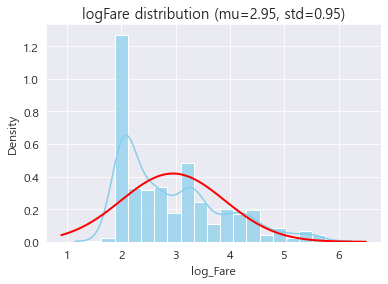

In [1040]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data2['log_Fare'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data2['log_Fare'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'logFare distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

In [1041]:
all_data2 = all_data2[[ 'Pclass' , 'SibSp' , 'Parch']]
all_data2

,Pclass,SibSp,Parch
PassengerId,,,
1,1.0,0.125,0.000000
2,0.0,0.125,0.000000
3,1.0,0.000,0.000000
4,0.0,0.125,0.000000
5,1.0,0.000,0.000000
...,...,...,...
1305,1.0,0.000,0.000000
1306,0.0,0.000,0.000000
1307,1.0,0.000,0.000000


In [1042]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data2),
                               encoded_nom_matrix,
                               sparse.csr_matrix(encoded_stan)],
                              format='csr')

all_data_sprs

<1309x15 sparse matrix of type '<class 'numpy.float64'>'
	with 9565 stored elements in Compressed Sparse Row format>

In [1043]:
CSR_NAMES = all_data2.columns.tolist() + nom_feature_names + ['Name','Age' , 'Fare']
CSR_NAMES

['Pclass',
 'SibSp',
 'Parch',
 'Sex_0',
 'Sex_1',
 'Sex_2',
 'Sex_3',
 'Embarked_0',
 'Embarked_1',
 'Name',
 'Age',
 'Fare']

In [1044]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived']

In [1045]:
print(X_train.toarray())

[[ 1.     0.125  0.    ... -0.122 -0.544 -1.019]
 [ 0.     0.125  0.    ...  1.138  0.642  1.383]
 [ 1.     0.     0.    ... -1.382 -0.248 -0.925]
 ...
 [ 1.     0.125  0.222 ... -1.382 -1.038  0.214]
 [ 0.     0.     0.    ... -0.122 -0.248  0.473]
 [ 1.     0.     0.    ... -0.122  0.197 -0.949]]


In [1046]:
X_train

<891x15 sparse matrix of type '<class 'numpy.float64'>'
	with 6517 stored elements in Compressed Sparse Row format>

In [1047]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 , 검증 데이터 분리

# X_train , X_valid , y_train , y_valid = train_test_split(X_train , y , test_size=0.1 , stratify=y,random_state=10)

# test_size 는 검증 데이터 크기를 지정하는 파라미터이다.
# 값이 정수면 검증 데이터의 개수를 , 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10%를 검증 데이터로 분리하겠다는 의미이다.

# stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포 될 수 있다.

## 하이퍼파라미터 최적화

In [1048]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성

logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록

lr_params = {'C': [0.1,0.125,0.2,0.3,0.4,0.5,0.8, 1.5,5,7,7.2] , 'max_iter' : [800,900,1000,2000],
             'solver' : ['liblinear'] , 'random_state' : [42]}
# C는 규제강도

# 그리드서치 객체 생성

gridsearch_logistic_model = GridSearchCV(estimator= logistic_model ,
                                         param_grid= lr_params,
                                         scoring = 'roc_auc' , # 평가지표
                                         cv = 5)

# 그리드서치 수행

gridsearch_logistic_model.fit(X_train,y)
print('최적 하이퍼파라미터: ' , gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터:  {'C': 5, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
Wall time: 802 ms


In [1049]:
# gridsearch_logistic_model.summary()

In [1050]:
best_logistic_model = gridsearch_logistic_model.best_estimator_

print(best_logistic_model.coef_)

[[-2.104 -3.491 -2.176  0.454 -0.226  0.28   0.307  1.638 -0.823  0.449
   0.328  0.039  0.454 -0.583  0.147]]


In [1051]:
import pandas as pd

# 계수와 피처명을 열로 갖는 데이터프레임을 만듭니다.
coef_df = pd.DataFrame({"coef": best_logistic_model.coef_[0],
                        "feature_name": CSR_NAMES})

# 계수를 기준으로 내림차순으로 정렬합니다.
coef_df = coef_df.sort_values(by="coef", ascending=False)

# 결과를 문자열 형태로 변환합니다.
result_str = "[ "
for index, row in coef_df.iterrows():
    result_str += f"'{row['feature_name']} : {row['coef']:.2f}' , "
result_str = result_str[:-2] + " ]"

# 결과를 출력합니다.
print(result_str)


ValueError: arrays must all be same length

In [ ]:
import re

# 피처명을 포함한 전체 리스트를 불러옵니

In [ ]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_train)[:,1]

In [ ]:
X_train

In [ ]:
from sklearn.metrics import roc_auc_score # Roc AUC 점수 계산 함수

# 검증 데이터 ROC AUC

roc_auc = roc_auc_score(y , y_valid_preds)

print(f'검증 데이터 ROC AUC :{roc_auc:.4f}')

print(gridsearch_logistic_model.score(X_train,y))

In [ ]:
# 검증 데이터를 활용한 타깃 예측

y_preds = gridsearch_logistic_model.predict_proba(X_test)[:, 1]
y_preds = gridsearch_logistic_model.predict(X_test)
y_preds

In [ ]:
# gridsearch_logistic_model.coef_ # 결정계수

In [ ]:
# y_preds2 = gridsearch_logistic_model.predict_proba(X_train)[:, 1]
# y_preds2 = gridsearch_logistic_model.predict(X_train)
# y_preds2

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = gridsearch_logistic_model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = gridsearch_logistic_model.predict_proba(X_train)[:, 1]
roc_auc = roc_auc_score(y, y_pred_proba)
print(f'AUC: {roc_auc:.2f}')

## 랜덤포레스트 모델을 돌려보자

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
#
# # 모델 생성
# randomforest_model = RandomForestRegressor()
#
# # 그리드서치 객체 생성
# rf_params = {'random_state':[123, 369, 1004], 'n_estimators':[150, 250, 500, 1000],
#              'max_depth':[5, 10, 15, 20, 30], 'max_features':["auto", "sqrt", "log2"]}
#
#
# # randomstate :
# grid_rf_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params, scoring='r2', cv=5)
#
# # estimator = 모델 이름
# # param_grid = 값 목록
# # scoring = 평가지표
# # cv = 교차검증 분할 수
#  # y= X_train['SalesPrice']
# grid_rf_model.fit(X_train, y_train)
# print(grid_rf_model.best_params_)

In [ ]:
# # 예측
#
# preds = grid_rf_model.best_estimator_.predict(X_train)
#
# # 평가
#
# # print(f'랜덤포레스트 RMSLE 값 : {rmsle(log_y , preds , True) :.4f}')
#
# grid_rf_model_preds = grid_rf_model.predict(X_test)
#
# grid_rf_model_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ",date_list)



In [ ]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')